In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import tensorflow as tf


np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/lo

In [2]:
from keras.datasets import boston_housing

In [7]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [8]:
print train_data.shape
print test_data.shape

(404, 13)
(102, 13)


In [11]:
train_targets[:10]

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,  14.4])

In [12]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [13]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [17]:
k = 4
num_val_samples = len(train_data) / k
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()

    model.fit(
            partial_train_data,
            partial_train_targets,
            epochs=100,
            batch_size=1,
            verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
print all_scores
print np.mean(all_scores)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)
[1.8713985528096113, 2.2566033637169562, 2.4748967307628971, 2.2676649766393226]
2.21764090598


In [18]:
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(
                partial_train_data,
                partial_train_targets,
                validation_data=(val_data, val_targets),
                epochs=500,
                batch_size=1,
                verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

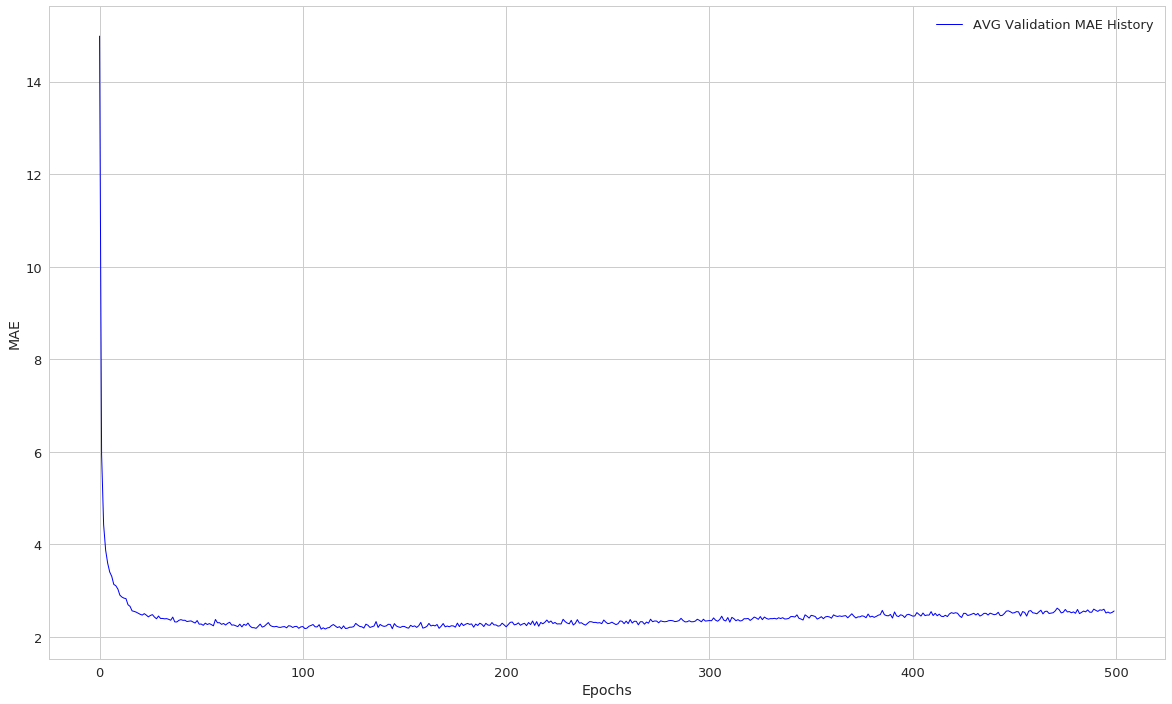

In [20]:
_ = plt.plot(range(500), average_mae_historyage_mae_history, 'b', label='AVG Validation MAE History', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('MAE')

_ = plt.legend()

In [21]:
model.fit(
        train_data, 
        train_targets,
        epochs=100, 
        batch_size=1, 
        verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

 32/102 [========>.....................] - ETA: 0s

2.4094384791804293